# <b>Phase 4: Data Modeling - Predict a song's popularity score based on its feature</b>

##### <b>Objectives:</b> 
- In this songs data modeling notebook, we would like to build a model that can predict a song's popularity based on the song's overall features such as artist's followers and popularity, song's duration, ... By building this model, we can analyze whether a song will be a hit based on the score prediction.

### <b><u>Step 1</u>: Import library</b>

##### These are the main libraries used for data modeling:

- `numpy`: work with arrays and some helper functions for modeling
- `pandas`: used to store data as a DataFrame
- `matplotlib`: used to visualize data
- `sklearn`: used model_selection and linear_model to build models for data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression as lr

### <b><u>Step 2</u>: Get the songs DataFrame from songs exploration notebook to build models</b>

At this step, we need to import the `songs_model_df` from the songs exploration notebook to split data and build models.

In [2]:
%store -r songs_model_df

### <b><u>Step 3</u>: Split the data into training set and test set</b>

Now that we have the songs DataFrame, we would like to split the data into training set and test set, with 80% of training set and 20% of test set using `train_test_split` function.

And then the split data will be stored in 4 variables: `train_features`, `test_features`, `train_label` and `test_label`

In [3]:
model_df = songs_model_df

train_features, test_features, train_label, test_label = train_test_split(model_df.iloc[:, :-1], model_df.iloc[:, -1], test_size = 0.2, shuffle=True)

Let's re-check the variables' shape

In [4]:
train_features.shape, train_label.shape, test_features.shape, test_label.shape

((2400, 6), (2400,), (600, 6), (600,))

So the shapes of these variables are proportionally correct.

Now, let's visualize the songs data to have an overview look.

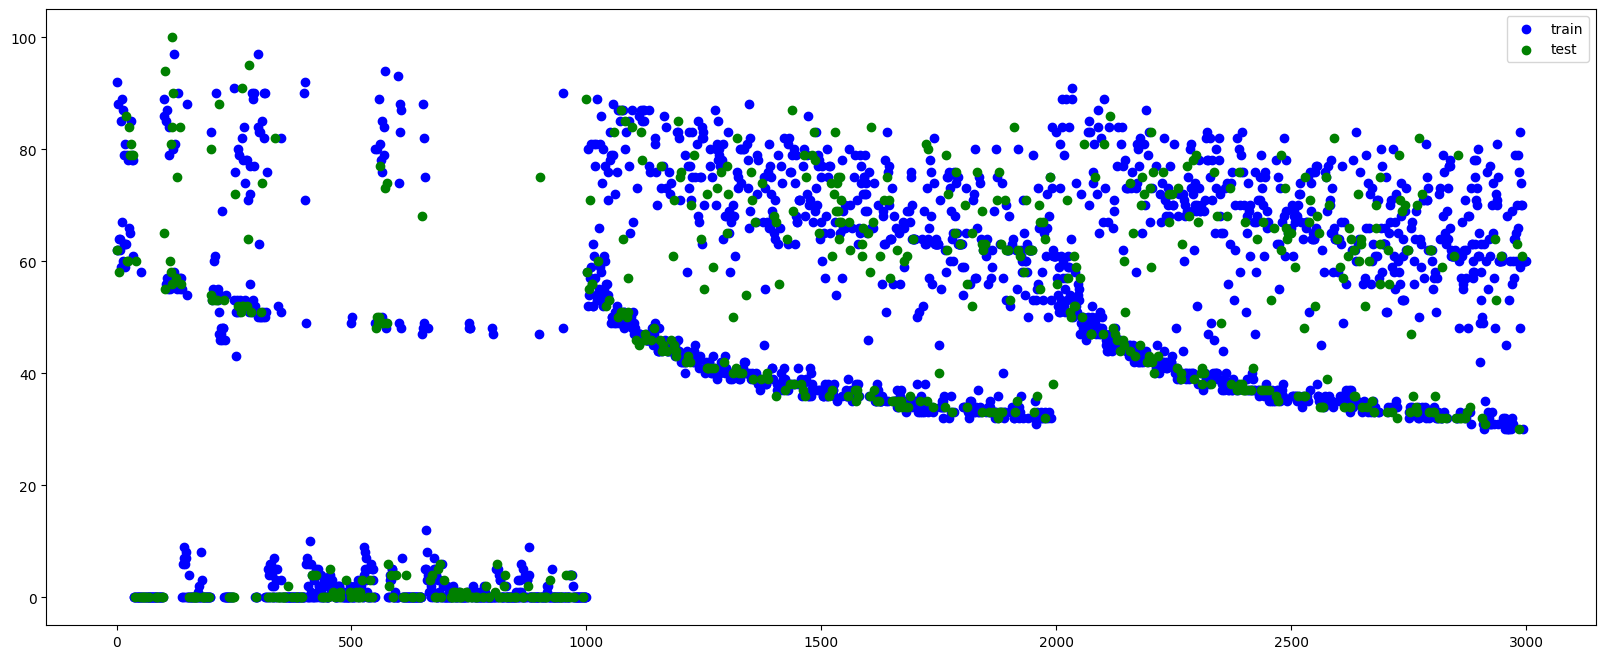

In [5]:
plt.figure(figsize=(20, 8))
plt.scatter(train_label.index, train_label.values, color='b', label='train')
plt.scatter(test_label.index, test_label.values, color='g', label='test')
plt.legend()

So the data is not splitted into training set and test set, randomly chosen.

### <b><u>Step 3</u>: Generate Linear Regression model with no bias and RMSE function</b>

At this step, we would like to build our own Linear Regression model with no bias to compare between either model with or without bias will perform better.

Furthermore, there will be a function to calculate the RMSE between the model prediction and the test set.

In [6]:
class LinearRegression:
    def fit(self, X, y):
        X_pinv = np.linalg.inv(X.T @ X) @ X.T
        self.w = X_pinv @ y
        return self

    def get_weight(self):
        return self.w

    def predict(self, X):
        return np.sum(self.w.ravel() * X, axis=1)

def model_rmse(y_test, y_pred):
    return np.sqrt(np.mean((y_test.ravel() - y_pred.ravel())**2))

### <b><u>Step 4</u>: Train and predict data with no-biased model</b>

Now, we will fit the whole training data into the model and then predict the test data.

In [7]:
model1 = LinearRegression().fit(train_features, train_label)

After we fit the train features and train label set into the model, now let's predict the songs' popularity of the test features set.

Since we would like to have a floor popularity score of 0, any value that is smaller than 0 will be set to 0. Finally, print the model RMSE and visualize the data.

In [8]:
y_pred = model1.predict(test_features)
result1 = pd.DataFrame(y_pred, columns=['popularity'], index=test_features.index)
result1[result1['popularity'] < 0] = 0
print('RMSE of no-biased model:', model_rmse(test_label, y_pred))

RMSE of no-biased model: 5.815629984847626


So the RMSE of this no-biased model is around 5.8, which is kind of decent.

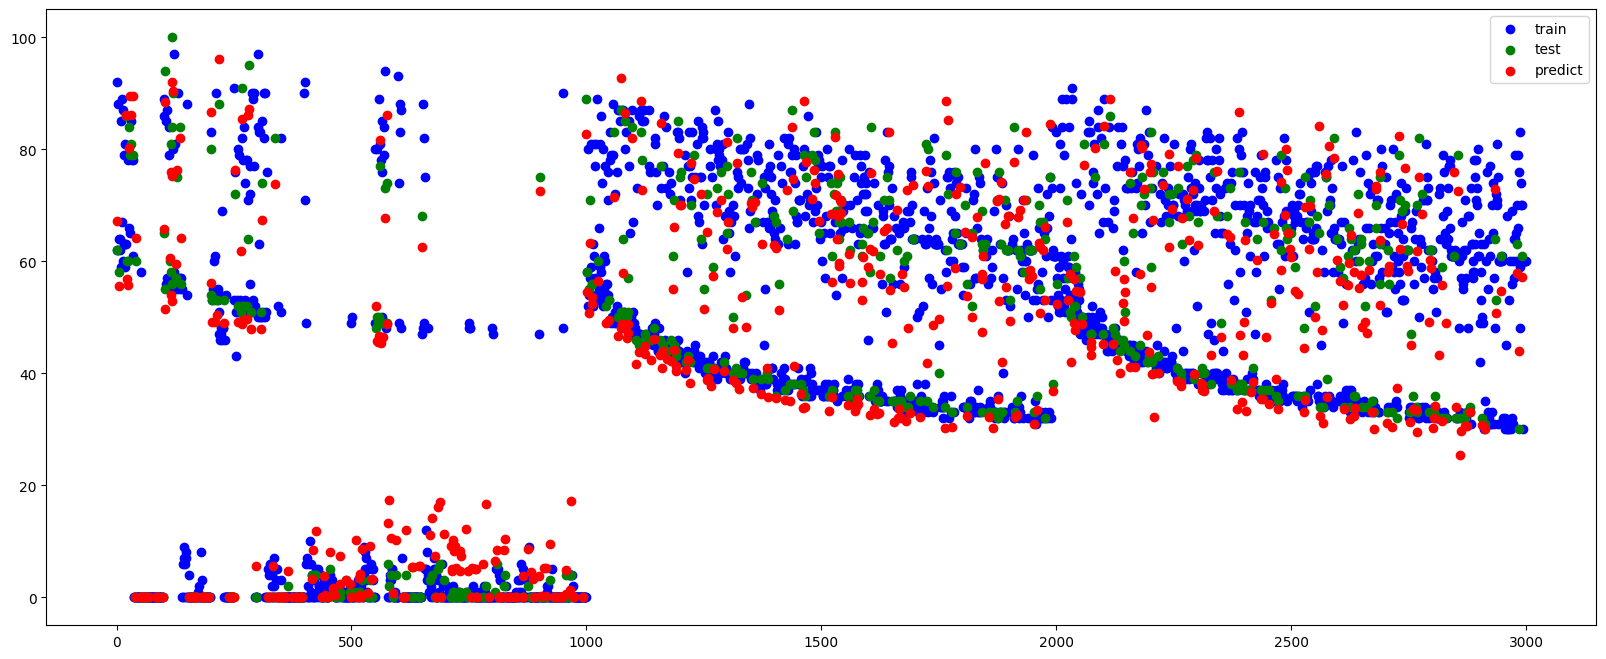

In [9]:
plt.figure(figsize=(20, 8))
plt.scatter(train_label.index, train_label.values, color='b', label='train')
plt.scatter(test_label.index, test_label.values, color='g', label='test')
plt.scatter(result1['popularity'].index, result1['popularity'].values, color='r', label='predict')
plt.legend()

### <b><u>Step 5</u>: Train and predict data with biased model</b>

day la markdown

In [13]:
model2 = lr().fit(train_features, train_label)
pred = model2.predict(test_features)
result2 = pd.DataFrame(pred, columns=['popularity'], index=test_features.index)
result2[result2['popularity'] < 0] = 0
print('RMSE of biased model:', model_rmse(test_label, pred))
print('Model accuracy:', model2.score(test_features, test_label))

RMSE of biased model: 5.713181830819302
Model accuracy: 0.9581959926472924


day la markdown

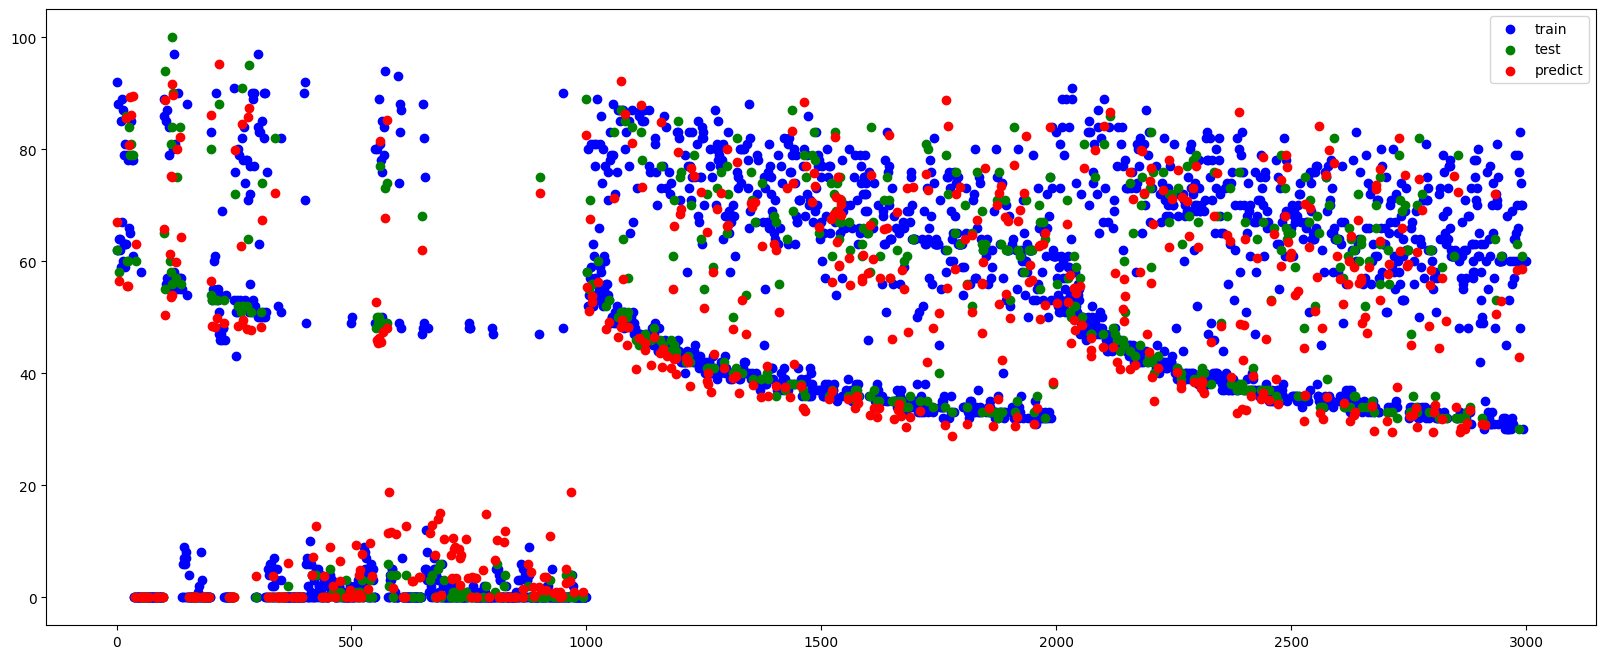

In [14]:
plt.figure(figsize=(20, 8))
plt.scatter(train_label.index, train_label.values, color='b', label='train')
plt.scatter(test_label.index, test_label.values, color='g', label='test')
plt.scatter(result2['popularity'].index, result2['popularity'].values, color='r', label='predict')
plt.legend()

day la markdown

In [ ]:
def train_each_feature_cross_validation(train, fold = 5):
    feature = {k: 0 for k in train.columns if k != 'popularity'}

    for train_split, test_split in KFold(n_splits=fold, shuffle=True).split(train):
        for column in feature.keys():
            feature_train = np.array(train.iloc[train_split].loc[:,[column]])
            label_train = np.array(train.iloc[train_split].loc[:,['popularity']])

            feature_test = np.array(train.iloc[test_split].loc[:,[column]])
            label_test = np.array(train.iloc[test_split].loc[:,['popularity']])
                
            model = LinearRegression().fit(feature_train, label_train)
            pred = model.predict(feature_test)
            rmse = model_rmse(label_test, pred)

            feature[column] += rmse

    return {k: v/fold for k, v in feature.items()}

day la markdown

In [ ]:
features = train_each_feature_cross_validation(pd.concat([train_features, train_label], axis=1))
best_feature = min(features, key=features.get)
print('The best feature in the dataset (most correlated feature to label):', best_feature)

day la markdown

In [ ]:
plt.scatter(model_df.loc[:, 'album_popularity'], model_df.loc[:, 'popularity'], color='b')
plt.show()

----
### <b> This is the end of Phase 4</b>